# Домашнее задание по теме: несбалансированные данные (Imbalanced Data)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
!where pip

C:\Anaconda3\envs\one\Scripts\pip.exe


In [2]:
#!conda install pandas matplotlib numpy seaborn -y

In [3]:
!pip install imbalanced-learn

In [4]:
import numpy as np

np.__version__

'1.19.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.3'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import imblearn

imblearn.__version__

'0.8.0'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [9]:
# загрузить датасет в pandas dataframe
df=pd.read_csv('hotel_bookings.csv')

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Анализ графических данных

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

- Предположим, что модель будет предсказывать результаты колонки `is_repeated_guest`.

- Проанализировать содержание колонки `is_repeated_guest`:
    - Используя график `seaborn.countplot` показать соотношение значений.
    - Вычислить процент соотношения значений (сколько процентов `True` и `False` в этой колонке).
    - Насколько сильно не сбалансирован дата сет?


119390 (is_repeated_guest)


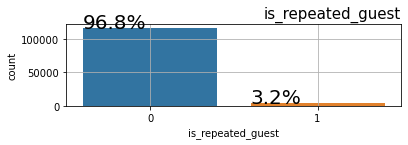

In [10]:
def plot_cat_count_s(cs: pd.Series):

    # создать график (сетка 1x1)
    fig, ax = plt.subplots(1, 1, figsize=(6, 1.5))

    # создать countplot
    g = sns.countplot(x=cs, 
                      ax=ax)

    # наименование графика справа
    ax.set_title(cs.name, 
                 loc='right', 
                 fontsize=15)

    # включить сетку на графике
    ax.grid()

    # сколько всего записей для всех категорий в колонке
    total = len(cs)
    
    print(f"{total} ({cs.name})")

    # для каждого столбца на графике сверху добавить процент
    for p in ax.patches:
        # вычислить процент, который соответствует текущему столбцу
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)

        # начало (слева) столбца на графике по оси x
        x_pos = p.get_x()
        
        # верх столбца на графике по оси x
        y_pos = p.get_y() + p.get_height()

        # добавить процент в качестве аннотации к столбцу
        ax.annotate(percentage, 
                    xy=(x_pos, y_pos), 
                    fontsize=20)

plot_cat_count_s(df.is_repeated_guest)

In [11]:
#дата сет очень сильно не сбалансирован

## Подготовка данных

- Разделить дата сет на две части:
    - `X` - все колонки кроме `is_repeated_guest`.
    - `y` - только колонка `is_repeated_guest`

**ВНИМАНИЕ:** колонка `is_repeated_guest` не последняя, важно правильно ее "вырезать" (допустим любой работающий способ).

In [12]:
# данные, на которых будет обучаться модель (=фичи, features)
X = df.drop(['is_repeated_guest'], axis='columns')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
y = df.is_repeated_guest
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_repeated_guest, Length: 119390, dtype: int64

## Oversampling

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

- Используя класс `RandomOverSampler` из пакета `imbalanced-learn` преобразовать `X` и `y` таким образом, чтобы класс меньшинства получил 75% примеров по сравнению с классом большинства. То есть в результате должно быть примерно такое соотношение: `57.1`/`42.9`.

- Вычислить насколько больше стало записей в датасете после этого преобразования. Какие есть идеи по этому поводу? Много это или мало?

In [14]:
over_sample = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.75)
over_sample

RandomOverSampler(sampling_strategy=0.75)

In [15]:
X_over, y_over = over_sample.fit_resample(X, y)

202265 (is_repeated_guest)


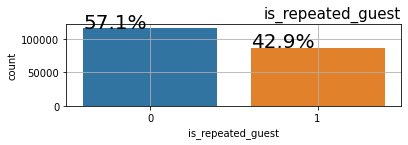

In [16]:
plot_cat_count_s(y_over)

In [17]:
#было 119390 , после преобразования стало 202265, т.е. почти в 2 раза больше записей
#Записей много, вероятность переобучения сильно увеличилась. Стоит рассмотреть использование under-sampling

## Oversampling

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

- Используя класс `RandomUnderSampler` из пакета `imbalanced-learn` преобразовать `X` и `y` таким образом, чтобы их соотношение стало 50/50.

- Вычислить насколько меньше стало записей в датасете после этого преобразования. Какие есть идеи по этому поводу? Много это или мало?

In [21]:
under_sample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='majority')
under_sample

RandomUnderSampler(sampling_strategy='majority')

In [22]:
X_under, y_under = under_sample.fit_resample(X, y)

7620 (is_repeated_guest)


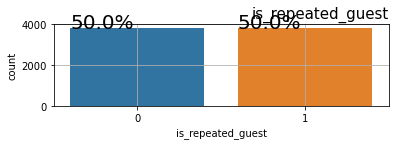

In [23]:
plot_cat_count_s(y_under)

In [ ]:
#было 119390 , после удаления стало 7620, т.е. в 15 раз меньше записей
#Удалено много значений, и для обучения осталось мало. Возможно, надо собрать больше данных